# Gökçe Şahin 090190306

# Homework #1

Remember: You must ingest the data to your notebooks directly from the data server. Also, don't write the same code with modifications to do similar things over and over again. Write a function.

In [73]:
from urllib.request import urlopen
from xmltodict import parse
from zipfile import ZipFile
from io import BytesIO

import pandas as pd
from matplotlib import pyplot as plt

## Question 1

Use [World Bank's Data Service](https://data.worldbank.org/) to retrieve

* Literacy rates of women (percentage of females ages 15 and above)
* Child mortality rate, under 5 year old. (per 1,000 live births)
* Gini index (Economic Inequality)

1. Plot each dataset for Turkey from earliest date available until this year.
2. Plot the same data for Greece, Bulgaria, Romania, Poland, Syria and Iran for the same periods. 
3. Do a scatter plot of female literacy rate against child mortality rate for Turkey. Do you see a relation? Which direction do you think the relation works?
4. Do a scatter plot of female literacy rate against gini index for Turkey. Do you see a relation? Which direction do you think the relation works?
5. Do a scatter plot of child mortality rate against the gini index for Turkey. Do you see a relation? Which direction do you think the relation works?

### 1. Plot each dataset for Turkey from earliest date available until this year.

In [74]:
def get_file(api_url, xml_file):
    with urlopen(api_url) as url:
        zfile = ZipFile(BytesIO(url.read()))
        data = parse(zfile.open(xml_file).read())

    return data

In [75]:
def get_data(data, country):
    rev_data = [{x['@name']: x['#text'] for x in y['field'] if '#text' in x.keys()} for y in data['Root']['data']['record']]
    years = [int(x['Year']) for x in rev_data if ('Value' in x.keys() and x['Country or Area'] == country)]
    values = [float(x['Value']) for x in rev_data if ('Value' in x.keys() and x['Country or Area'] == country)]

    return [years, values]

In [76]:
def plot_data(years, values, title, ylabel):
    plt.plot(years, values)

    plt.title(title)
    plt.xlabel("Years")
    plt.ylabel(ylabel)

#### Literacy rates of women (percentage of females ages 15 and above) for Turkey

In [77]:
literacy_rate_of_women_data = get_file('https://api.worldbank.org/v2/en/indicator/SE.ADT.LITR.FE.ZS?downloadformat=xml', 
'API_SE.ADT.LITR.FE.ZS_DS2_en_xml_v2_4651512.xml')
years, values = get_data(literacy_rate_of_women_data, 'Turkiye')

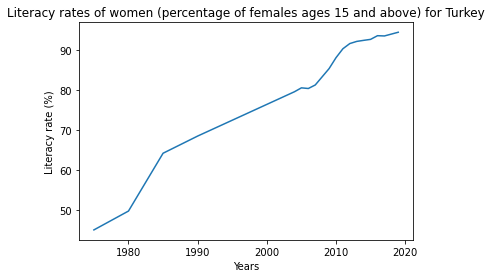

In [78]:
plot_data(years, values, "Literacy rates of women (percentage of females ages 15 and above) for Turkey", "Literacy rate (%)")

#### Child mortality rate, under 5 year old. (per 1,000 live births) for Turkey

In [79]:
child_mortality_rate_data = get_file('https://api.worldbank.org/v2/en/indicator/SH.DYN.MORT?downloadformat=xml', 
'API_SH.DYN.MORT_DS2_en_xml_v2_4639508.xml')
years, values = get_data(child_mortality_rate_data, 'Turkiye')

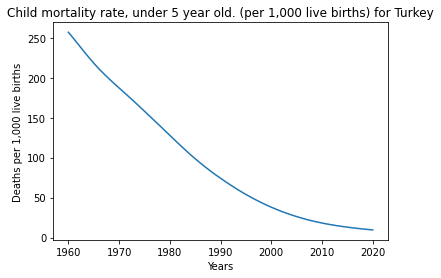

In [80]:
plot_data(years, values, "Child mortality rate, under 5 year old. (per 1,000 live births) for Turkey", "Deaths per 1,000 live births")

#### Gini index (Economic Inequality) for Turkey

In [81]:
gini_index_data = get_file('https://api.worldbank.org/v2/en/indicator/SI.POV.GINI?downloadformat=xml', 
'API_SI.POV.GINI_DS2_en_xml_v2_4639705.xml')
years, values = get_data(gini_index_data, 'Turkiye')

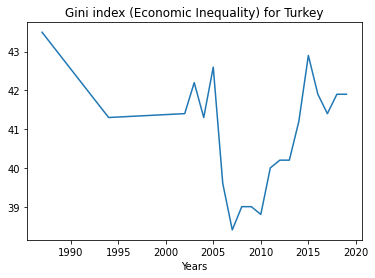

In [82]:
plot_data(years, values, "Gini index (Economic Inequality) for Turkey", "")

### 2. Plot the same data for Greece, Bulgaria, Romania, Poland, Syria and Iran for the same periods. 

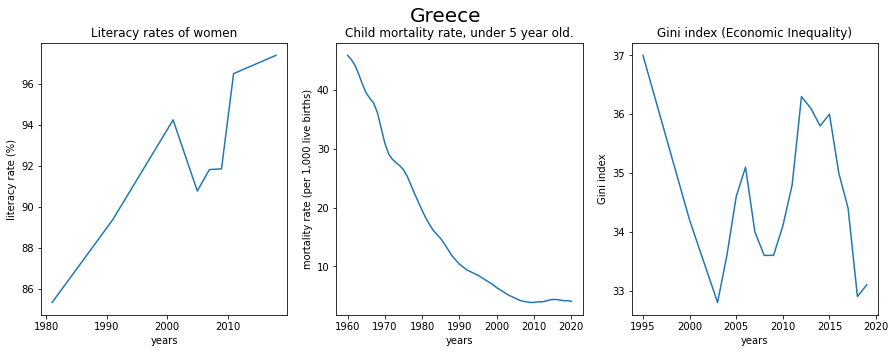

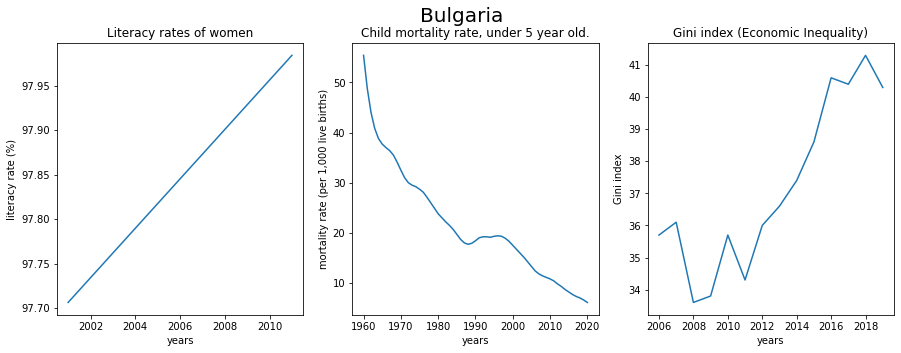

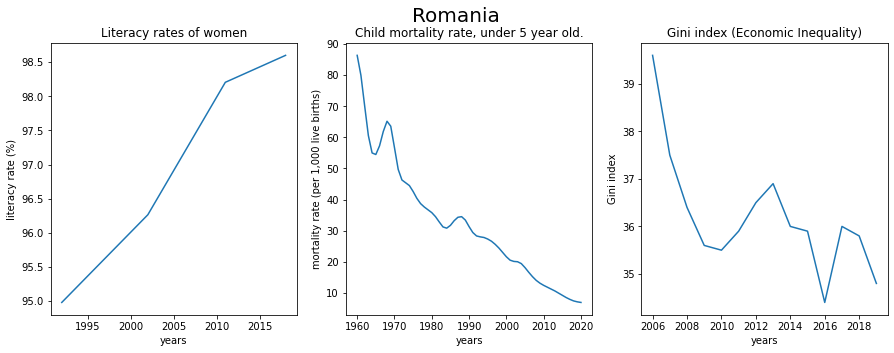

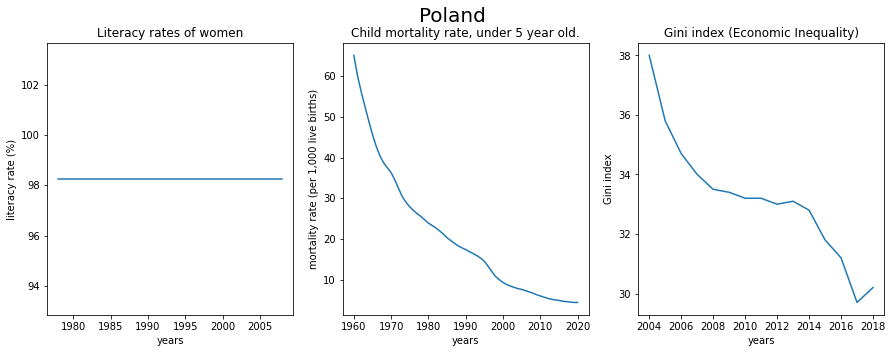

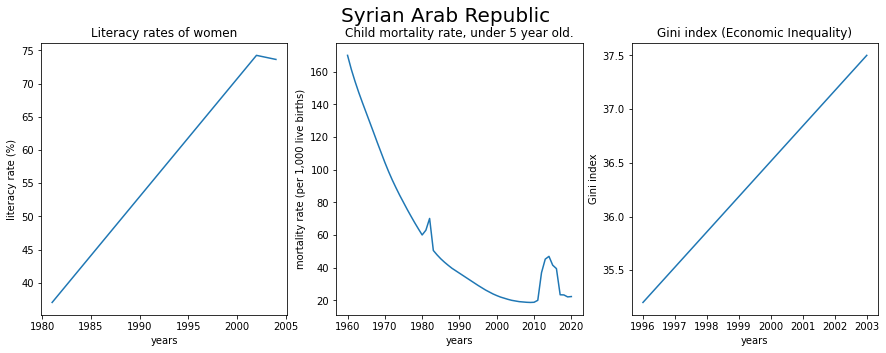

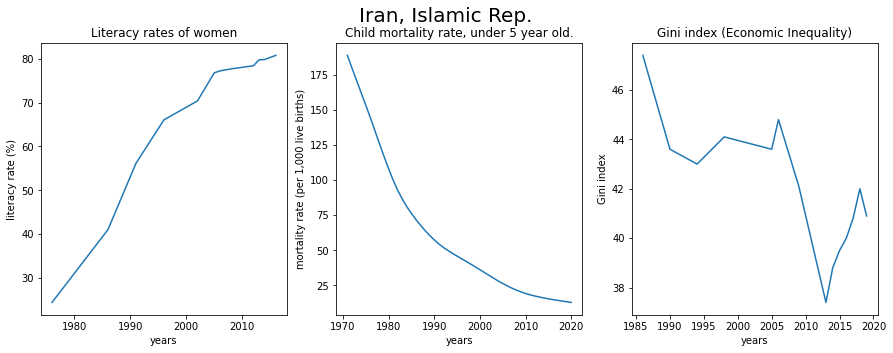

In [83]:
countries = ['Greece', 'Bulgaria', 'Romania', 'Poland', 'Syrian Arab Republic', 'Iran, Islamic Rep.']

for country in countries:
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
    fig.suptitle(country, fontsize = 20)

    years, values = get_data(literacy_rate_of_women_data, country)
    ax1.plot(years, values)
    ax1.set(xlabel="years", ylabel="literacy rate (%)")
    ax1.set_title("Literacy rates of women")

    years, values = get_data(child_mortality_rate_data, country)
    ax2.plot(years, values)
    ax2.set(xlabel="years", ylabel="mortality rate (per 1,000 live births)")
    ax2.set_title("Child mortality rate, under 5 year old.")
    
    years, values = get_data(gini_index_data, country)
    ax3.plot(years, values)
    ax3.set(xlabel="years", ylabel="Gini index")
    ax3.set_title("Gini index (Economic Inequality)")

### 3. Do a scatter plot of female literacy rate against child mortality rate for Turkey. Do you see a relation? Which direction do you think the relation works?

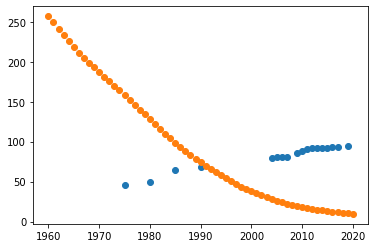

In [84]:
lr_years, TR_literacy_rates = get_data(literacy_rate_of_women_data, 'Turkiye')
mr_years, TR_child_mortality_rates = get_data(child_mortality_rate_data, 'Turkiye')
plt.scatter(lr_years, TR_literacy_rates)
plt.scatter(mr_years, TR_child_mortality_rates)


they're going in the opposite direction

### 4. Do a scatter plot of female literacy rate against gini index for Turkey. Do you see a relation? Which direction do you think the relation works?

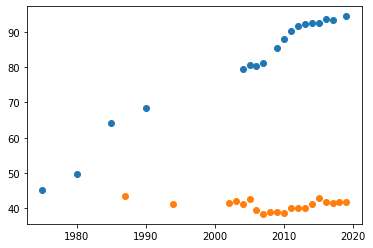

In [85]:
gi_years, TR_gini_index = get_data(gini_index_data, 'Turkiye')

plt.scatter(lr_years, TR_literacy_rates)
plt.scatter(gi_years, TR_gini_index)

it seems to be they do not have a relation

### 5. Do a scatter plot of child mortality rate against the gini index for Turkey. Do you see a relation? Which direction do you think the relation works?

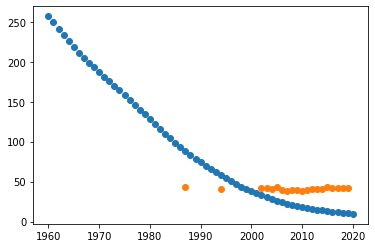

In [86]:
plt.scatter(mr_years, TR_child_mortality_rates)
plt.scatter(gi_years, TR_gini_index)

negative relation

***

## Question 2

Use Istanbul Municipality Data Server to retrieve the data on [Rail Transportation Data](https://data.ibb.gov.tr/dataset/yas-grubuna-gore-rayli-sistemler-istasyon-bazli-yolcu-ve-yolculuk-sayilari).

1. Explore the dataset and explain each column.
2. Notice that the longitude and lattitude data is not recorded correctly. However, it is easy to correct the data. Explain how you would correct it and then write a function to correct it.
3. Notice that the passenger information is split according to age brackets. Find the total number of passengers for each station ~~in each month~~ and store it in a pandas dataframe. Then plot it on a map of Istanbul. Use disks of different sizes depending on the total number of passengers.
4. Write a function that accepts the age bracket as input (<20, 20-30, 30-60, 60+, unknown) and returns a probability an array of maps (dictionaries) of the form

    {Station Name: probability that the specific age bracket uses the station}
5. The return value for the function you wrote above is a probability distribution on the set of stations, i.e. the usage patterns of different age brackets. Figure out which stations are favored by each age bracket.
6. How do we check that the usage patterns for different age brackets are different? Use your idea to write a code to check for these differences.

### 1. Explore the dataset and explain each column.

* passage_cnt --> It includes the number of daily passage on the rail systems. 
* passanger_cnt --> It includes the number of daily passenger on the rail systems.
* transaction_year --> Contains the year of the measurement.
* trasansaction_month --> Contains the month of the measurement.
* line --> Contains rail system line information.
* station_name --> Contains the name of the station.
* station_number --> Contains station number information.
* town --> Contains the district information where the station is located.
* latitude --> Contains the latitude information where the station is located.
* longitude --> Contains the longitude information where the station is located.
* Age-Group --> Contains the age group information of the people who have made the transition.

In [87]:
with urlopen('https://data.ibb.gov.tr/dataset/d3df8db4-1ac6-4bfe-8896-7ec1159caa2b/resource/7aec630d-2757-4da0-97f1-71b140abd818/download/2021-yl-ya-grubuna-gore-rayl-sistemler-istasyon-bazl-yolcu-ve-yolculuk-saylar.xlsx') as url:
    ibb_df = pd.read_excel(url.read()).dropna()
ibb_df

,passage_cnt,passanger_cnt,transaction_year,transaction_month,line,station_name,station_number,town,latitude,longitude,Age-Group
0,7.424,4.227,2.021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,410340555555556,289920277777778,20-30
1,18.374,9.479,2.021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,410340555555556,289920277777778,30-60
2,3.190,1.430,2.021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,410340555555556,289920277777778,60+
3,949.000,469.000,2.021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,410340555555556,289920277777778,<20
4,8.673,4.222,2.021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,410340555555556,289920277777778,Unknown
...,...,...,...,...,...,...,...,...,...,...,...
17077,9.295,8.209,2.021,12,TF2-TELEFERIK EYUP PIYERLOTI,Pierloti,PLT-EYU,EyüpSultan,410533333333333,289335555555556,20-30
17078,10.554,9.361,2.021,12,TF2-TELEFERIK EYUP PIYERLOTI,Pierloti,PLT-EYU,EyüpSultan,410533333333333,289335555555556,30-60
17079,1.552,1.235,2.021,12,TF2-TELEFERIK EYUP PIYERLOTI,Pierloti,PLT-EYU,EyüpSultan,410533333333333,289335555555556,60+
17080,3.319,2.632,2.021,12,TF2-TELEFERIK EYUP PIYERLOTI,Pierloti,PLT-EYU,EyüpSultan,410533333333333,289335555555556,<20


### 2. Notice that the longitude and lattitude data is not recorded correctly. However, it is easy to correct the data. Explain how you would correct it and then write a function to correct it.

In [88]:
def correct_data(df):
    df['longitude'] = [str(x)[:2]+'.'+str(x)[2:] for x in df['longitude']]
    df['latitude'] = [str(x)[:2]+'.'+str(x)[2:] for x in df['latitude']]

    df['latitude'] = df['latitude'].apply(pd.to_numeric, downcast='float', errors='coerce')
    df['longitude'] = df['longitude'].apply(pd.to_numeric, downcast='float', errors='coerce')
    
    return df

In [89]:
ibb_df = correct_data(ibb_df)

### 3. Notice that the passenger information is split according to age brackets. Find the total number of passengers for each station ~~in each month~~ and store it in a pandas dataframe. Then plot it on a map of Istanbul. Use disks of different sizes depending on the total number of passengers.

In [90]:
import plotly.express as px
import plotly.graph_objects as go

stations_passanger_count = ibb_df.groupby(['station_name', 'latitude', 'longitude'], as_index=False)['passanger_cnt'].sum()

fig = px.scatter_mapbox(stations_passanger_count,
                        lat='latitude',
                        lon="longitude",
                        color = 'passanger_cnt',
                        size='passanger_cnt',
                        mapbox_style='carto-positron')

fig.show()

burada noramlde map var ama githubda gozukmuyor nedenini anlamadim.

### 4. Write a function that accepts the age bracket as input (<20, 20-30, 30-60, 60+, unknown) and returns a probability an array of maps (dictionaries) of the form
### {Station Name: probability that the specific age bracket uses the station}

In [91]:
def age_bracket_pr(age_bracket):
    age_brackets_passanger_count = ibb_df.groupby(['Age-Group'])['passanger_cnt'].sum()
    station_passanger_count = ibb_df[ibb_df['Age-Group'] == age_bracket]
    
    station_names = [name for name in station_passanger_count['station_name']]
    pr = [float(x)/age_brackets_passanger_count[age_bracket] for x in station_passanger_count['passanger_cnt']]

    return dict(zip(station_names, pr))
    

In [92]:
age_bracket_pr('<20')

{'KABATAS': 4.091351281392134e-05,
 'TAKSIM': 3.937594235395972e-05,
 'Beyoğlu': 1.7404590677818464e-05,
 'Karaköy': 7.629530661671639e-05,
 'AKSARAY': 7.535862576179724e-05,
 'AKSARAY 1': 2.790955483185511e-05,
 'ATAKOY': 9.432199476799058e-05,
 'BAGCILAR MEYDAN': 7.433711343322503e-05,
 'BAHCELIEVLER': 3.42683807110987e-05,
 'BAKIRKOY': 3.612760384199482e-05,
 'BAYRAMPASA': 4.6742141982833335e-05,
 'DAVUTPASA': 3.077968635711681e-05,
 'EMNIYET': 7.878016186580379e-05,
 'ESENLER': 4.3564496365579313e-05,
 'KARTALTEPE': 0.00015602275327164595,
 'KIRAZLI': 5.453956826944331e-05,
 'MENDERES': 5.057723152089853e-05,
 'MERTER': 3.331402663250183e-05,
 'OTOGAR': 2.268888455745668e-05,
 'OTOGAR 1': 3.108720044910913e-05,
 'SAGMALCILAR': 4.582666899632745e-05,
 'TERAZIDERE': 2.8312504331707123e-05,
 'UCYUZLU': 3.870789449894191e-05,
 'ULUBATLI': 5.289242382267983e-05,
 'YENIKAPI': 0.0002092297604757892,
 'ZEYTINBURNU': 7.156595196055857e-05,
 '4 Levent 2 Güney': 3.98248422353738e-05,
 '4 Leve

### 5. The return value for the function you wrote above is a probability distribution on the set of stations, i.e. the usage patterns of different age brackets. Figure out which stations are favored by each age bracket.

In [93]:
age_brackets = ['<20', '20-30', '30-60', '60+', 'Unknown']
for age_bracket in age_brackets:
    print("Usage for '"+age_bracket+"' (top 10):")
    df = pd.DataFrame(list(age_bracket_pr(age_bracket).items()), columns = ['station_name', 'probability'])
    display(df.sort_values('probability', ascending=False)[0:10])

Usage for '<20' (top 10):


,station_name,probability
224,Küçükyalı-2,0.002870
144,ÇIRÇIR BATI,0.002368
134,NURTEPE DOĞU,0.001856
34,Hacıosman 2 Kuzey,0.001753
132,MECİDİYEKÖY DOĞU,0.001569
256,Mahmutbey M7 Hol 2,0.001308
246,Çayırova,0.000428
255,Mahmutbey M7 Hol 1,0.000399
24,YENIKAPI,0.000209
31,Darüşşafaka Güney,0.000180


Usage for '20-30' (top 10):


,station_name,probability
31,Darüşşafaka Güney,0.007338
247,Çayırova,0.006494
258,Mahmutbey M7 Hol 1,0.003300
24,YENIKAPI,0.002350
241,Yenikapı-2,0.002271
46,Taksim Güney,0.001822
54,Şişli 2 Kuzey,0.001679
50,Yenikapı Kuzey,0.001623
49,Yenikapı Güney,0.001547
203,Ayrılıkçeşmesi,0.001521


Usage for '30-60' (top 10):


,station_name,probability
258,Mahmutbey M7 Hol 1,0.002304
24,YENIKAPI,0.002043
243,Yenikapı-2,0.001923
48,Taksim Güney,0.001623
52,Yenikapı Kuzey,0.001530
57,Şişli 2 Kuzey,0.001469
232,Sirkeci-1,0.001356
205,Ayrılıkçeşmesi,0.001290
156,Eminönü 2,0.001272
51,Yenikapı Güney,0.001261


Usage for '60+' (top 10):


,station_name,probability
219,Güzelyalı,0.002160
141,YENİMAHALLE,0.002156
139,VEYSELKARANİ BATI,0.002149
45,Seyrantepe 2 Doğu,0.002116
146,ÇIRÇIR DOĞU,0.002040
44,Seyrantepe 1 Batı,0.002031
131,MAHMUTBEY M7 HOL 2,0.001921
259,Mahmutbey M7 Hol 3,0.001890
108,ÇEKMEKÖY 1,0.001876
211,Darıca,0.001863


Usage for 'unknown' (top 10):


,station_name,probability


### 6. How do we check that the usage patterns for different age brackets are different? Use your idea to write a code to check for these differences.

# Question 3

For this question use Yahoo Finance API via [yfinance](https://pypi.org/project/yfinance/) library. Retrieve the data for Microsoft [MSFT], Apple [AAPL] and NASDAQ-100 [NDX]. from January 1, 2000.

1. Calculate the log of each series, and then calculate the first derivative of the result. What you got is called the [log-return](https://core.ac.uk/download/pdf/161062652.pdf) of each series. 
2. Merge the series you obtain in Step 1 into a single pandas dataframe.
3. Plot the histograms of results you obtained above (use 10 bins).
4. Plot all three series in a single plot to compare. Do you see a relationship? 
5. How do we see if there are any correlations between these series? What is the statistically correct way of testing it? Find the right statistical test and measure all three correlations.

### 1. Calculate the log of each series, and then calculate the first derivative of the result. What you got is called the [log-return](https://core.ac.uk/download/pdf/161062652.pdf) of each series. 

In [94]:
import yfinance as yf
from datetime import date
import numpy as np

msft = yf.Ticker("MSFT")
aapl = yf.Ticker("AAPL")
ndx = yf.Ticker("NDX")

hist_msft = msft.history(start=('2000-01-01'), end = date.today())
hist_aapl = aapl.history(start=('2000-01-01'), end = date.today())
hist_ndx = ndx.history(start=('2000-01-01'), end = date.today())

msft_log = pd.DataFrame(np.log(hist_msft['Close']))
aapl_log = pd.DataFrame(np.log(hist_aapl['Close']))
ndx_log = pd.DataFrame(np.log(hist_ndx['Close']))

msft_diff = pd.DataFrame(msft_log['Close']).diff()
aapl_diff = pd.DataFrame(aapl_log['Close']).diff()
ndx_diff = pd.DataFrame(ndx_log['Close']).diff()




### 2. Merge the series you obtain in Step 1 into a single pandas dataframe.

In [95]:
msft_merged = pd.merge(msft_log, msft_diff, on = 'Date', how = 'inner')
aapl_merged = pd.merge(aapl_log, aapl_diff, on = 'Date')
ndx_merged = pd.merge(ndx_log, ndx_diff, on = 'Date')
print(msft_merged)

                            Close_x   Close_y
Date                                         
2000-01-03 00:00:00-05:00  3.598828       NaN
2000-01-04 00:00:00-05:00  3.564464 -0.034364
2000-01-05 00:00:00-05:00  3.574953  0.010489
2000-01-06 00:00:00-05:00  3.540881 -0.034072
2000-01-07 00:00:00-05:00  3.553865  0.012983
...                             ...       ...
2022-10-03 00:00:00-04:00  5.483718  0.033108
2022-10-04 00:00:00-04:00  5.516971  0.033253
2022-10-05 00:00:00-04:00  5.518256  0.001285
2022-10-06 00:00:00-04:00  5.508538 -0.009718
2022-10-07 00:00:00-04:00  5.456346 -0.052191

[5729 rows x 2 columns]


### 3. Plot the histograms of results you obtained above (use 10 bins).

In [96]:
msft_log.plot.bar(bins = [x for x in range(np.upper((int(min(hist_msft['Close'])), int(max(hist_msft['Close']))), 10)])

SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' (855872315.py, line 1)

### 5. How do we see if there are any correlations between these series? What is the statistically correct way of testing it? Find the right statistical test and measure all three correlations.

Using T-test and calculating the p-value is the correct way to find out if there are any correlations.